# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATA_PATH = Path('../data/')

## Options

In [3]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [4]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [5]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [6]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 15.705s 


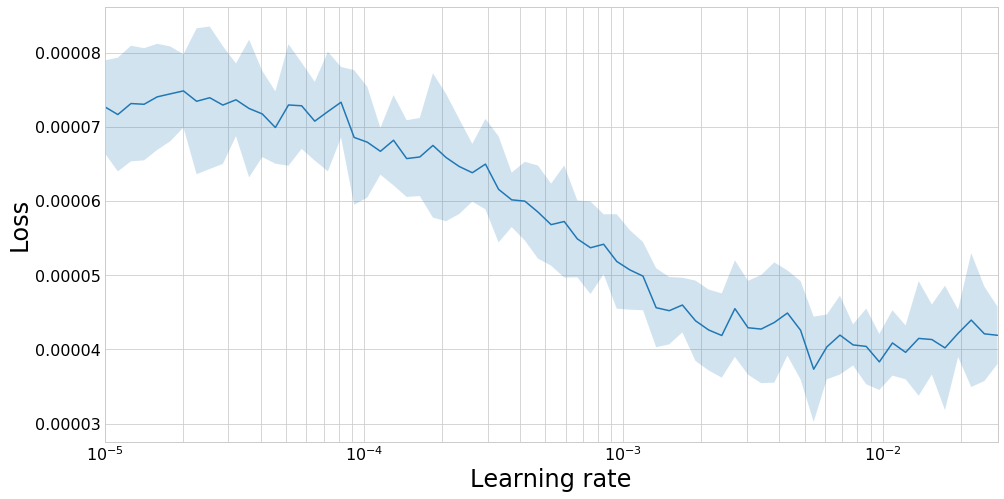

______________________________________



In [7]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [8]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':5e-4}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.226469). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113577). Check your callbacks.
  % delta_t_median)


1 New best found: 4.105191330881892e-05
2 New best found: 3.7930444542834196e-05
3 New best found: 3.7373256319897717e-05
4 New best found: 3.5899034661904955e-05
5 New best found: 3.520326556218509e-05
6 New best found: 3.489471475770078e-05
7 New best found: 3.483439929818474e-05
10 New best found: 3.403149782936571e-05
11 New best found: 3.40134107418357e-05
12 New best found: 3.381986694107802e-05
13 New best found: 3.3644763936665085e-05
14 New best found: 3.35764009443093e-05
19 New best found: 3.339267764589048e-05
20 New best found: 3.339063466468939e-05
22 New best found: 3.304844789241826e-05
23 New best found: 3.300014490209659e-05
24 New best found: 3.2965700803954324e-05
25 New best found: 3.290203671645271e-05
28 New best found: 3.283548297489076e-05
29 New best found: 3.282292279058011e-05
30 New best found: 3.282287564786966e-05
31 New best found: 3.2821252310734334e-05
37 New best found: 3.2684578775574085e-05
40 New best found: 3.267552597036465e-05
41 New best found:

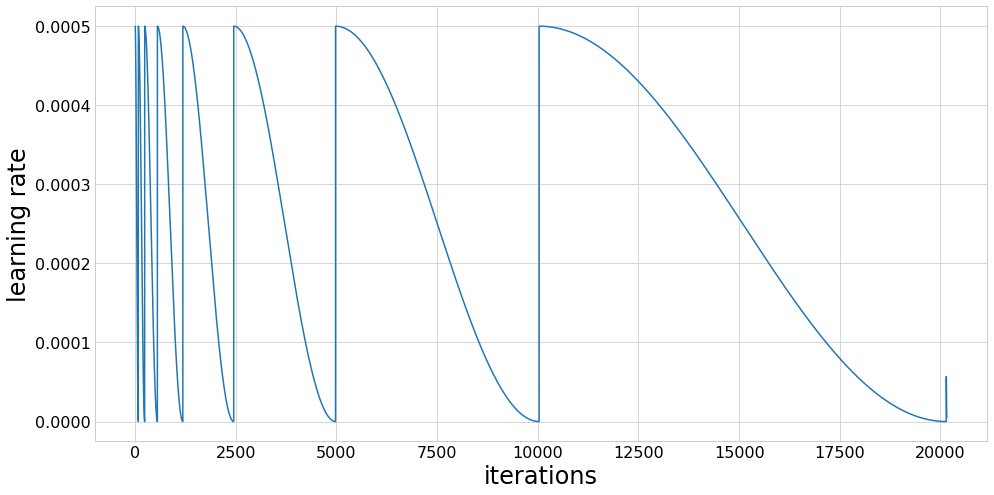

Fold took 207.379s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.256217). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128461). Check your callbacks.
  % delta_t_median)


1 New best found: 4.2907681458896834e-05
2 New best found: 3.7955033558126626e-05
3 New best found: 3.744451073744916e-05
4 New best found: 3.6339500865415216e-05
5 New best found: 3.5626004476251395e-05
6 New best found: 3.5483527821642864e-05
7 New best found: 3.534687502966247e-05
8 New best found: 3.510147935525864e-05
9 New best found: 3.4552921665566835e-05
11 New best found: 3.4055303613250594e-05
12 New best found: 3.3835686577276054e-05
14 New best found: 3.3781025600357474e-05
16 New best found: 3.3741827076716184e-05
17 New best found: 3.3515936365373754e-05
18 New best found: 3.348445038960833e-05
19 New best found: 3.3447607863393294e-05
22 New best found: 3.3267735274574826e-05
23 New best found: 3.3252503168447784e-05
24 New best found: 3.322502863168596e-05
25 New best found: 3.307517609268935e-05
26 New best found: 3.2953782015309e-05
27 New best found: 3.28692499075316e-05
28 New best found: 3.285958092274389e-05
29 New best found: 3.2837919170691204e-05
30 New best f

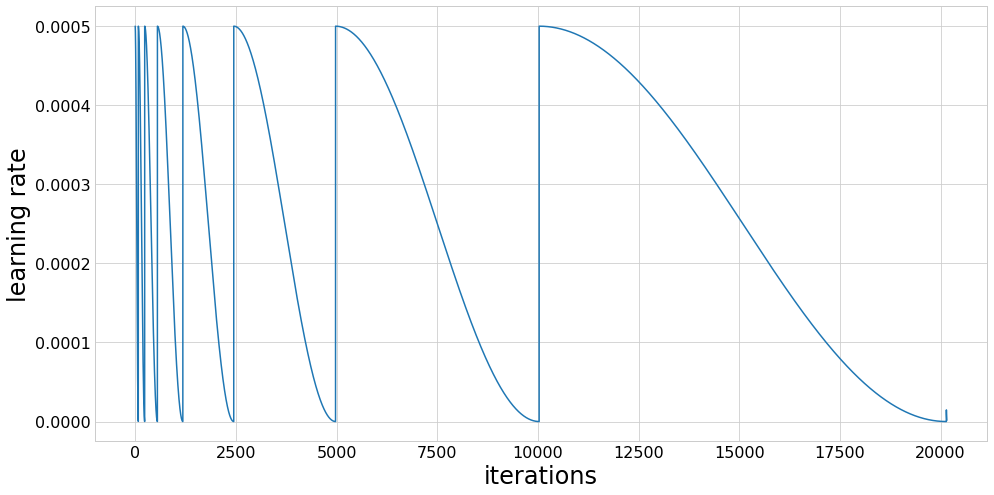

Fold took 209.086s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217560). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109098). Check your callbacks.
  % delta_t_median)


1 New best found: 4.319163548061624e-05
2 New best found: 3.742265662876889e-05
3 New best found: 3.6880145780742166e-05
4 New best found: 3.510998588026269e-05
5 New best found: 3.4467007152852604e-05
6 New best found: 3.378469021845376e-05
8 New best found: 3.3473278245946855e-05
9 New best found: 3.329497654194711e-05
10 New best found: 3.30538087466266e-05
11 New best found: 3.278200938075315e-05
12 New best found: 3.260284534480889e-05
13 New best found: 3.249568181927316e-05
15 New best found: 3.249373167491285e-05
19 New best found: 3.241425419546431e-05
20 New best found: 3.217030916857766e-05
21 New best found: 3.20891721159569e-05
22 New best found: 3.196888335078256e-05
24 New best found: 3.189757516520331e-05
26 New best found: 3.1861090603342746e-05
29 New best found: 3.180968945962377e-05
30 New best found: 3.178045122622279e-05
31 New best found: 3.177956390427426e-05
39 New best found: 3.165710653702263e-05
40 New best found: 3.158755896001821e-05
44 New best found: 3.1

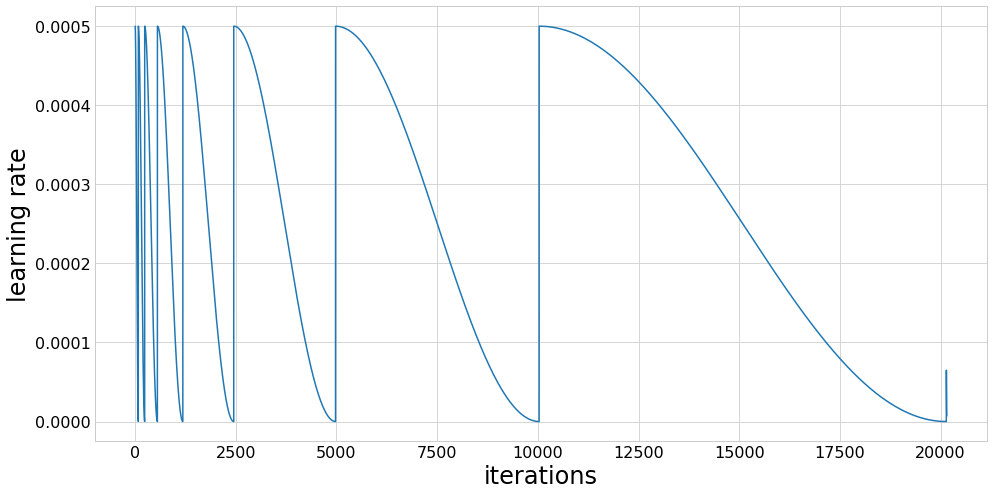

Fold took 214.721s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.272579). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136658). Check your callbacks.
  % delta_t_median)


1 New best found: 4.119143300340511e-05
2 New best found: 3.794374418212101e-05
3 New best found: 3.722319590015104e-05
4 New best found: 3.5824852250516417e-05
5 New best found: 3.551942844496807e-05
6 New best found: 3.503931704617571e-05
7 New best found: 3.494093151530251e-05
8 New best found: 3.492761651723413e-05
9 New best found: 3.4896750286861786e-05
10 New best found: 3.428830863413168e-05
11 New best found: 3.415090680209687e-05
12 New best found: 3.395170150033664e-05
13 New best found: 3.379619088227628e-05
14 New best found: 3.376406612078427e-05
15 New best found: 3.3749794839241074e-05
20 New best found: 3.355730451148702e-05
21 New best found: 3.337553801975446e-05
22 New best found: 3.335183801682433e-05
23 New best found: 3.3076211019943e-05
24 New best found: 3.304740029270761e-05
25 New best found: 3.3047248869843316e-05
26 New best found: 3.297794692916796e-05
27 New best found: 3.2976947652059605e-05
28 New best found: 3.289308372914093e-05
29 New best found: 3.2

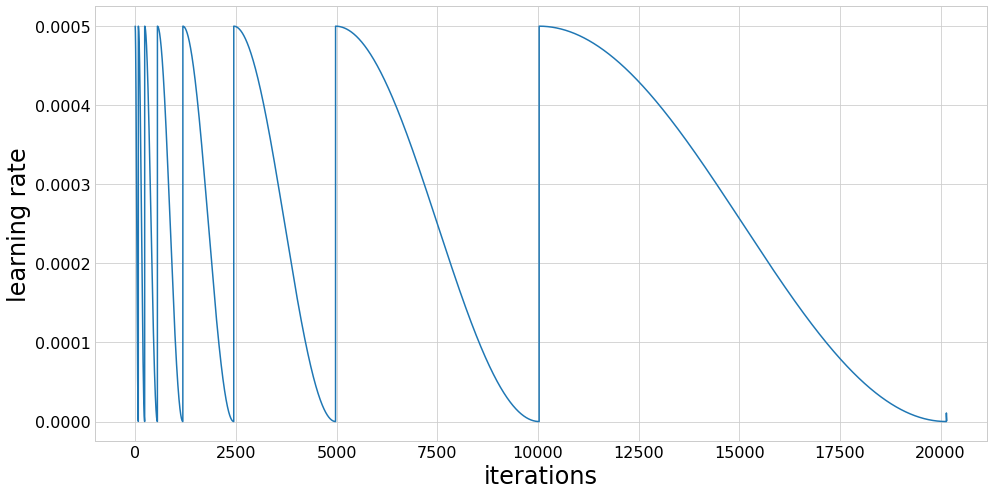

Fold took 221.231s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.317612). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159158). Check your callbacks.
  % delta_t_median)


1 New best found: 4.091759443103263e-05
2 New best found: 3.7007207658058704e-05
3 New best found: 3.6436847281459696e-05
4 New best found: 3.517650999464257e-05
5 New best found: 3.4706069226861896e-05
6 New best found: 3.428292541598826e-05
7 New best found: 3.42286469079808e-05
8 New best found: 3.420830622955991e-05
9 New best found: 3.364801478408056e-05
11 New best found: 3.330630848119897e-05
12 New best found: 3.30688254824115e-05
13 New best found: 3.298953229661288e-05
14 New best found: 3.292674262740473e-05
15 New best found: 3.29163648242624e-05
16 New best found: 3.2914187546426824e-05
19 New best found: 3.275392942988508e-05
20 New best found: 3.249363785574365e-05
21 New best found: 3.2390945565988864e-05
23 New best found: 3.227267683321031e-05
24 New best found: 3.225619497668252e-05
25 New best found: 3.222492652727947e-05
27 New best found: 3.215598097199205e-05
30 New best found: 3.2148083926317106e-05
31 New best found: 3.2145200260377506e-05
33 New best found: 3.

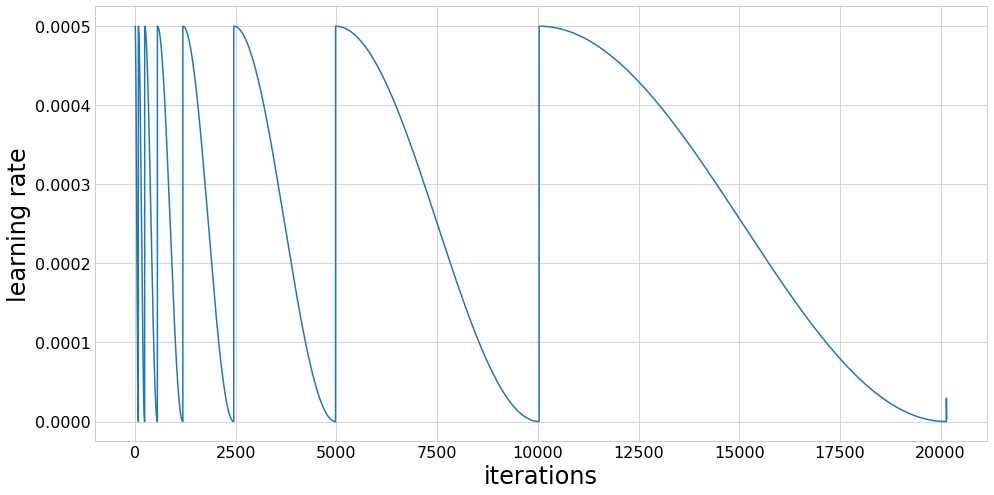

Fold took 226.069s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.330690). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165708). Check your callbacks.
  % delta_t_median)


1 New best found: 4.2352367540297564e-05
2 New best found: 3.794468009436969e-05
3 New best found: 3.720009915414266e-05
4 New best found: 3.633625992661109e-05
5 New best found: 3.580917293729726e-05
6 New best found: 3.552309873775812e-05
7 New best found: 3.5428767863777466e-05
8 New best found: 3.514794832735788e-05
10 New best found: 3.4787838874035514e-05
11 New best found: 3.4592928517668043e-05
12 New best found: 3.4304537849675396e-05
13 New best found: 3.421665970090544e-05
14 New best found: 3.4132669972314034e-05
15 New best found: 3.412822619138751e-05
17 New best found: 3.407913774281042e-05
19 New best found: 3.38909444748424e-05
20 New best found: 3.3789062708092385e-05
21 New best found: 3.3647980706882665e-05
22 New best found: 3.336225599196041e-05
23 New best found: 3.3309020144224636e-05
24 New best found: 3.3237855552579276e-05
26 New best found: 3.316795513092075e-05
29 New best found: 3.312080019386485e-05
30 New best found: 3.311064821027685e-05
31 New best fou

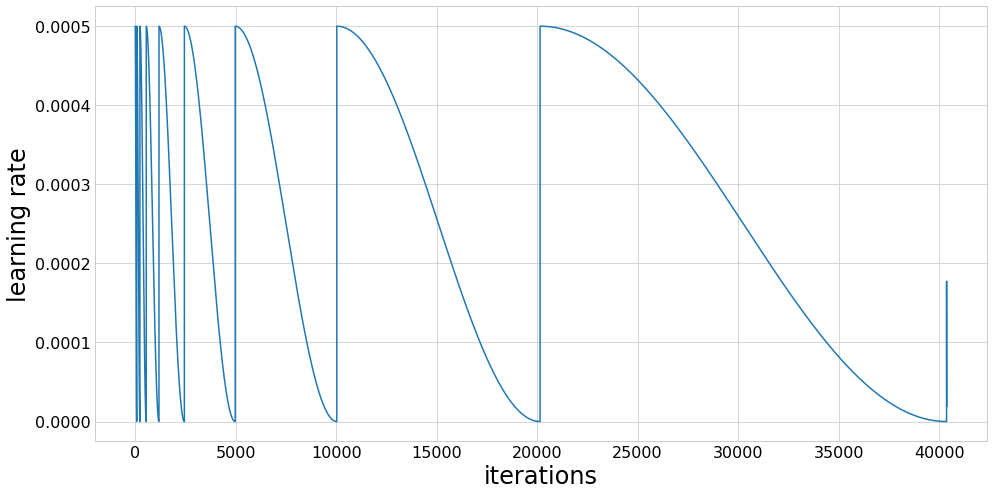

Fold took 447.629s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.327652). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164219). Check your callbacks.
  % delta_t_median)


1 New best found: 4.1906496945011896e-05
2 New best found: 3.7941803490684836e-05
3 New best found: 3.730784387589665e-05
4 New best found: 3.619919123593718e-05
5 New best found: 3.59136484505143e-05
6 New best found: 3.541924869641662e-05
7 New best found: 3.5354009096045044e-05
8 New best found: 3.5148417789605445e-05
9 New best found: 3.4876000974327325e-05
10 New best found: 3.4646127319138034e-05
11 New best found: 3.432612254837295e-05
12 New best found: 3.421020912646782e-05
13 New best found: 3.412238211458316e-05
14 New best found: 3.4045485450769776e-05
15 New best found: 3.404318171378691e-05
18 New best found: 3.3885795748210514e-05
19 New best found: 3.3749078342225405e-05
20 New best found: 3.3570166789286306e-05
22 New best found: 3.3478935751190876e-05
23 New best found: 3.3373252225283066e-05
24 New best found: 3.3325145913113376e-05
25 New best found: 3.320891911716899e-05
27 New best found: 3.314912941277726e-05
29 New best found: 3.3116728365712334e-05
30 New best 

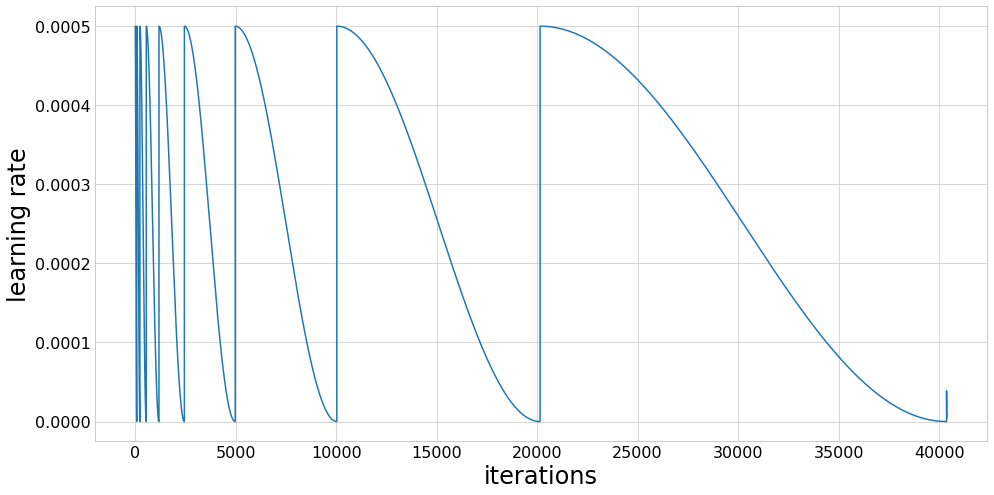

Fold took 454.629s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.388416). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194611). Check your callbacks.
  % delta_t_median)


1 New best found: 4.145810286926597e-05
2 New best found: 3.7748352046582815e-05
3 New best found: 3.6539803405015824e-05
4 New best found: 3.552610293653432e-05
5 New best found: 3.4992191302480096e-05
6 New best found: 3.474226783662463e-05
7 New best found: 3.4625725852756875e-05
9 New best found: 3.392655302938937e-05
11 New best found: 3.388607401632723e-05
12 New best found: 3.345589935461894e-05
13 New best found: 3.3373446108837215e-05
14 New best found: 3.3293465871913435e-05
15 New best found: 3.329089381746365e-05
17 New best found: 3.315767004011108e-05
19 New best found: 3.306672323200537e-05
21 New best found: 3.3060781799826495e-05
22 New best found: 3.276884130807289e-05
23 New best found: 3.267908037232226e-05
26 New best found: 3.2630641779607754e-05
27 New best found: 3.253619789157231e-05
28 New best found: 3.252046154858075e-05
30 New best found: 3.251317481430013e-05
31 New best found: 3.2508693397419656e-05
36 New best found: 3.232278973958224e-05
44 New best fou

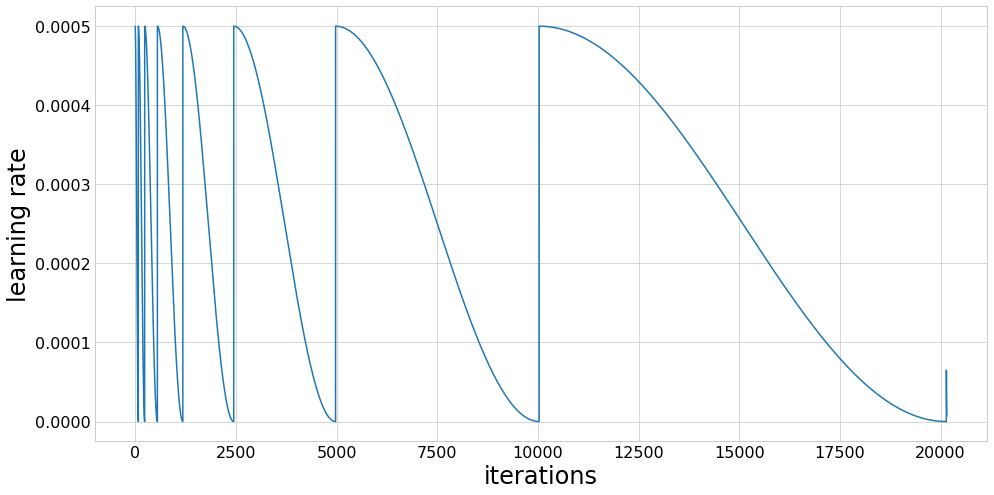

Fold took 237.579s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.423040). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.211874). Check your callbacks.
  % delta_t_median)


1 New best found: 4.12121717336971e-05
2 New best found: 3.704289067013716e-05
3 New best found: 3.6571625395998564e-05
4 New best found: 3.528047697303306e-05
5 New best found: 3.465514176074649e-05
6 New best found: 3.447942095482444e-05
7 New best found: 3.444696448304925e-05
10 New best found: 3.353595582090628e-05
11 New best found: 3.353276449381485e-05
12 New best found: 3.327469911230695e-05
13 New best found: 3.3172983258774416e-05
14 New best found: 3.3150422009496886e-05
15 New best found: 3.314532364332773e-05
16 New best found: 3.313709848921915e-05
20 New best found: 3.278117045220298e-05
21 New best found: 3.263824068076877e-05
23 New best found: 3.260525636317188e-05
24 New best found: 3.2594184789430705e-05
26 New best found: 3.243626121449629e-05
27 New best found: 3.235180804591101e-05
28 New best found: 3.232495307519337e-05
30 New best found: 3.232379828641887e-05
31 New best found: 3.232172200410665e-05
38 New best found: 3.230707772689221e-05
41 New best found: 3

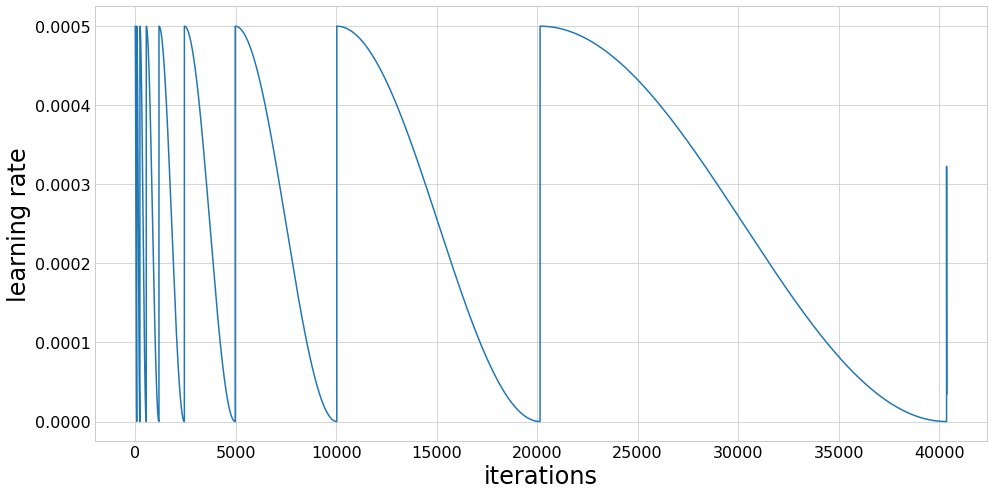

Fold took 467.722s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.429053). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215280). Check your callbacks.
  % delta_t_median)


1 New best found: 4.272841978701728e-05
2 New best found: 3.860061322416547e-05
3 New best found: 3.810038487482382e-05
4 New best found: 3.6559392272415966e-05
5 New best found: 3.606654565539074e-05
6 New best found: 3.56774024288288e-05
7 New best found: 3.565167288802013e-05
8 New best found: 3.532934188461713e-05
9 New best found: 3.522804547117718e-05
10 New best found: 3.467917898517662e-05
11 New best found: 3.443095758631087e-05
12 New best found: 3.427301187516949e-05
13 New best found: 3.423481981446734e-05
14 New best found: 3.413638062172248e-05
15 New best found: 3.412954440941252e-05
18 New best found: 3.379131492718808e-05
19 New best found: 3.370059600811937e-05
21 New best found: 3.3481264284700664e-05
23 New best found: 3.337359614456644e-05
24 New best found: 3.329397157789957e-05
25 New best found: 3.317521438902871e-05
27 New best found: 3.311337879281462e-05
28 New best found: 3.308793548912078e-05
30 New best found: 3.3082940976068324e-05
31 New best found: 3.30

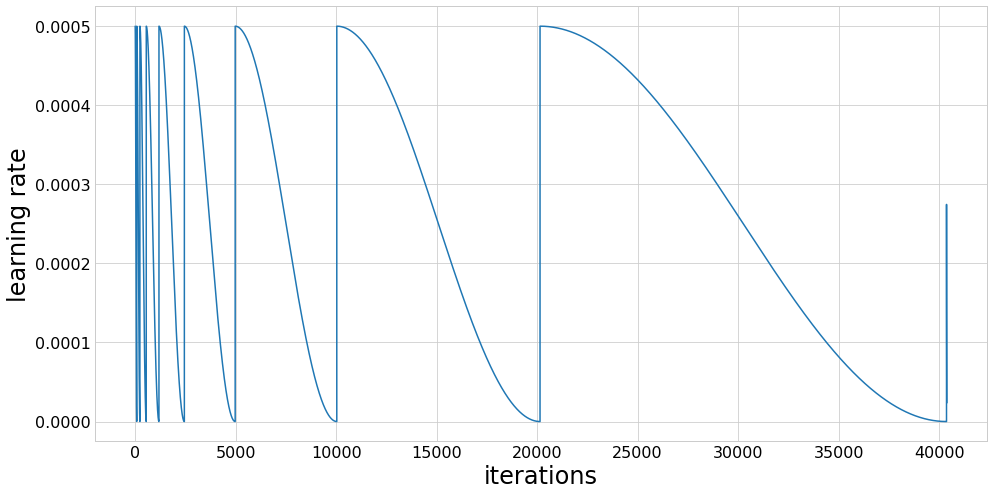

Fold took 478.605s


______________________________________
Training finished
Cross-validation took 3167.635s 


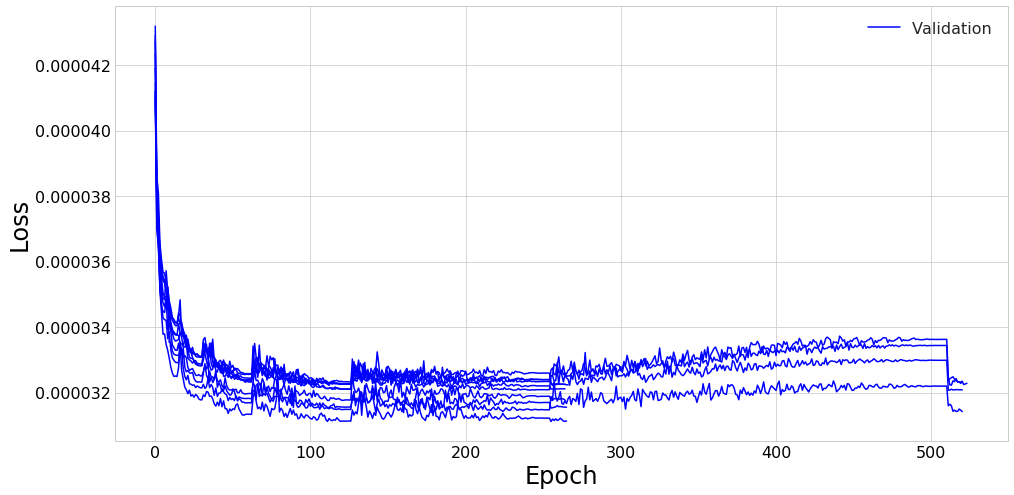

Mean loss = 3.19e-05 +- 1e-07
Mean wAUC = 0.0637 +- 0.0005
Mean AUC = 0.1 +- 0.0009
Mean AMS = 3.83 +- 0.06
Mean cut = 0.955 +- 0.007
______________________________________



<Figure size 432x288 with 0 Axes>

In [9]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [10]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [11]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 2 with loss = 3.111782633786788e-05
Model 1 is 8 with loss = 3.138825691573649e-05
Model 2 is 4 with loss = 3.152698321703773e-05
Model 3 is 7 with loss = 3.175964588495187e-05
Model 4 is 6 with loss = 3.2072396716830557e-05
Model 5 is 3 with loss = 3.21080662906752e-05
Model 6 is 0 with loss = 3.221703313668985e-05
Model 7 is 9 with loss = 3.2227240036679696e-05
Model 8 is 1 with loss = 3.225079200763097e-05
Model 9 is 5 with loss = 3.2280119003553406e-05


## Response on validation data

In [12]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [13]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0018272442424669862s per sample

Predicting fold 2 out of 10
Prediction took 0.00035236024428159s per sample

Predicting fold 3 out of 10
Prediction took 0.0003491796160116792s per sample

Predicting fold 4 out of 10
Prediction took 0.0003478664364665747s per sample

Predicting fold 5 out of 10
Prediction took 0.00035056757871061565s per sample

Predicting fold 6 out of 10
Prediction took 0.00034780645817518235s per sample

Predicting fold 7 out of 10
Prediction took 0.0003468846706673503s per sample

Predicting fold 8 out of 10
Prediction took 0.00034746497441083194s per sample

Predicting fold 9 out of 10
Prediction took 0.0003451524598523974s per sample

Predicting fold 10 out of 10
Prediction took 0.0003542349008843303s per sample



In [14]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9031920899652177, weighted 0.9356328986033944


In [15]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.931104570746108, 0.95981765)

In [16]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9611836270196363, corresponds to calc_ams of 3.9090332309785043
CPU times: user 1.83 s, sys: 18.9 s, total: 20.8 s
Wall time: 2min 3s


(4.0, 0.96)

# Test scoring

In [17]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [18]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0003494702743366361s per sample

Predicting fold 2 out of 10
Prediction took 0.0003475356741215695s per sample

Predicting fold 3 out of 10
Prediction took 0.00034838744527236984s per sample

Predicting fold 4 out of 10
Prediction took 0.0003468970575285229s per sample

Predicting fold 5 out of 10
Prediction took 0.0003490368104116483s per sample

Predicting fold 6 out of 10
Prediction took 0.0003503976697610183s per sample

Predicting fold 7 out of 10
Prediction took 0.00034821345743469217s per sample

Predicting fold 8 out of 10
Prediction took 0.00035248179240998895s per sample

Predicting fold 9 out of 10
Prediction took 0.000349147524853999s per sample

Predicting fold 10 out of 10
Prediction took 0.0003494991074400869s per sample

CPU times: user 3min 27s, sys: 11.1 s, total: 3min 38s
Wall time: 3min 12s


In [20]:
score_test_data(test_fy.source, 0.9611836270196363)

Public:Private AMS: 3.5567719644609253 : 3.710677168288996


(3.5567719644609253, 3.710677168288996)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)